# Anticipez les besoins en consommation électrique de bâtiments

##  I-Réaliser une courte analyse exploratoire 
### I.1 Choix des données d'entrées 

In [1]:
#import librairies
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from numpy import array
from numpy import argmax

   
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
#fonction responsable de l'import du fichier et description globale du dataframe
def describe_data(file_path):
    #load file 
    df = pd.read_csv(file_path, error_bad_lines=False, sep=',')
    # taille
    print(df.shape)
    # taille, type, mémoire
    df.info() 
    return df


In [3]:
#appel des fonctions définies
df16=describe_data('2016-building-energy-benchmarking.csv')
columns16= df16.columns

df15=describe_data('2015-building-energy-benchmarking.csv')
columns15= df15.columns

(3376, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude 

In [4]:
#les 5 premières lignes du dataframe
df15.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [5]:
df15.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [6]:
#les 5 premières lignes du dataframe
df16.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
df16.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [8]:
#les types des colonnes 
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(df15.dtypes)

In [9]:
#les types des colonnes 
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(df16.dtypes)

In [10]:
def getNonResidential(df):
    df= df[df["BuildingType"].isin(['NonResidential', 'Nonresidential COS', 'Campus' 'Nonresidential WA'])]
    print (df.shape)
    return df

In [11]:
#valeurs manquantes par variable
def missing_percentage_variable(df):
    columns = df.columns
    for i in range(df.shape[1]):
        n_miss = df.iloc[:,i].isnull().sum()
        perc = n_miss / df.shape[0] * 100
        print(columns[i]+' >  Valeurs manquantes: %d (%.1f%%)' % ( n_miss, perc))


In [12]:
#filtrer les batiments non résidentiels sur les relevés 2015
df15= getNonResidential(df15)
#filtrer les batiments non résidentiels sur les relevés 2016
df16= getNonResidential(df16)

(1529, 47)
(1545, 46)


In [13]:
#valeurs manquantes relevés 2015
missing_percentage_variable(df15)

OSEBuildingID >  Valeurs manquantes: 0 (0.0%)
DataYear >  Valeurs manquantes: 0 (0.0%)
BuildingType >  Valeurs manquantes: 0 (0.0%)
PrimaryPropertyType >  Valeurs manquantes: 0 (0.0%)
PropertyName >  Valeurs manquantes: 0 (0.0%)
TaxParcelIdentificationNumber >  Valeurs manquantes: 1 (0.1%)
Location >  Valeurs manquantes: 0 (0.0%)
CouncilDistrictCode >  Valeurs manquantes: 0 (0.0%)
Neighborhood >  Valeurs manquantes: 0 (0.0%)
YearBuilt >  Valeurs manquantes: 0 (0.0%)
NumberofBuildings >  Valeurs manquantes: 0 (0.0%)
NumberofFloors >  Valeurs manquantes: 7 (0.5%)
PropertyGFATotal >  Valeurs manquantes: 0 (0.0%)
PropertyGFAParking >  Valeurs manquantes: 0 (0.0%)
PropertyGFABuilding(s) >  Valeurs manquantes: 0 (0.0%)
ListOfAllPropertyUseTypes >  Valeurs manquantes: 57 (3.7%)
LargestPropertyUseType >  Valeurs manquantes: 61 (4.0%)
LargestPropertyUseTypeGFA >  Valeurs manquantes: 61 (4.0%)
SecondLargestPropertyUseType >  Valeurs manquantes: 729 (47.7%)
SecondLargestPropertyUseTypeGFA >  Vale

In [14]:
#valeurs manquantes relevés 2016
missing_percentage_variable(df16)

OSEBuildingID >  Valeurs manquantes: 0 (0.0%)
DataYear >  Valeurs manquantes: 0 (0.0%)
BuildingType >  Valeurs manquantes: 0 (0.0%)
PrimaryPropertyType >  Valeurs manquantes: 0 (0.0%)
PropertyName >  Valeurs manquantes: 0 (0.0%)
Address >  Valeurs manquantes: 0 (0.0%)
City >  Valeurs manquantes: 0 (0.0%)
State >  Valeurs manquantes: 0 (0.0%)
ZipCode >  Valeurs manquantes: 16 (1.0%)
TaxParcelIdentificationNumber >  Valeurs manquantes: 0 (0.0%)
CouncilDistrictCode >  Valeurs manquantes: 0 (0.0%)
Neighborhood >  Valeurs manquantes: 0 (0.0%)
Latitude >  Valeurs manquantes: 0 (0.0%)
Longitude >  Valeurs manquantes: 0 (0.0%)
YearBuilt >  Valeurs manquantes: 0 (0.0%)
NumberofBuildings >  Valeurs manquantes: 2 (0.1%)
NumberofFloors >  Valeurs manquantes: 0 (0.0%)
PropertyGFATotal >  Valeurs manquantes: 0 (0.0%)
PropertyGFAParking >  Valeurs manquantes: 0 (0.0%)
PropertyGFABuilding(s) >  Valeurs manquantes: 0 (0.0%)
ListOfAllPropertyUseTypes >  Valeurs manquantes: 2 (0.1%)
LargestPropertyUseTyp

In [15]:
#2016
#LargestPropertyUseType >  Valeurs manquantes: 6 (0.4%)
#SecondLargestPropertyUseType >  Valeurs manquantes: 703 (45.5%)
#ThirdLargestPropertyUseType >  Valeurs manquantes: 1200 (77.7%)
#ENERGYSTARScore >  Valeurs manquantes: 539 (34.9%)
    
#2015
#LargestPropertyUseType >  Valeurs manquantes: 61 (4.0%)
#SecondLargestPropertyUseType >  Valeurs manquantes: 729 (47.7%)
#ThirdLargestPropertyUseType >  Valeurs manquantes: 1205 (78.8%)
#ENERGYSTARScore >  Valeurs manquantes: 507 (33.2%)
    
print("Pourcentage de valeur nulles dans le fichier de 2015")
print(df15.isna().sum().sum()*100/(df15.notnull().sum().sum()+df15.isna().sum().sum()))
print("Pourcentage de valeur nulles ENERGYSTARScore dans le fichier de 2015")
print(df15['ENERGYSTARScore'].isna().sum().sum()*100/(df15['ENERGYSTARScore'].notnull().sum().sum()+df15['ENERGYSTARScore'].isna().sum().sum()))

print("Pourcentage de valeur nulles dans le fichier de 2016")
print(df16.isna().sum().sum()*100/(df16.notnull().sum().sum()+df16.isna().sum().sum()))
print("Pourcentage de valeur nulles ENERGYSTARScoredans le fichier de 2016")
print(df16['ENERGYSTARScore'].isna().sum().sum()*100/(df16['ENERGYSTARScore'].notnull().sum().sum()+df16['ENERGYSTARScore'].isna().sum().sum()))

Pourcentage de valeur nulles dans le fichier de 2015
16.635820937060796
Pourcentage de valeur nulles ENERGYSTARScore dans le fichier de 2015
33.15892740353172
Pourcentage de valeur nulles dans le fichier de 2016
12.570704938792739
Pourcentage de valeur nulles ENERGYSTARScoredans le fichier de 2016
34.88673139158576


### I.2 Correction des données

In [16]:
#Objectif : unifier la présentation des variables dans les fichiers 2015 et 2016 (sur le fichier 2015, extraire les variables
#latitude, longitude et addresse puisqu'elles sont concaténées dans une seule variable Location) en vue de possibles fusion
df15["Latitude"]=df15["Location"]
df15["Longitude"]=df15["Location"]
df15["Address"]=df15["Location"]

def get_latitude (row):
    lat= row
    lat = lat.split(',')[0][lat.index(': ')+1:]
    lat=lat.replace("\'","").replace("\"","").replace(" ","")
    print(lat)
    return lat

def get_longitude(row):
    long= row
    long = long.split(',')[1][long.index(': ')+2:]
    long=long.replace("\'","")
    print(long)
    return long

def get_address(row):
    add= row
    r= add.split(',')[2].rindex(":")
    add = add.split(',')[2][r+1 : ]
    add = add.replace("\"", "")
    print(add)
    return add


In [17]:
#extraction des variables
df15['Latitude']= df15['Latitude'].apply (lambda row : get_latitude(row))
df15['Longitude']= df15['Longitude'].apply (lambda row : get_longitude(row))
df15['Address']= df15['Address'].apply (lambda row : get_address(row))

47.61219025
47.61310583
47.61334897
47.61421585
47.6137544
47.6164389
47.6141141
47.61290234
47.60258934
47.60712147
47.60718204
47.60709939
47.60809326
47.60761642
47.60667501
47.60544586
47.60656003
47.60552597
47.60397899
47.60264587
47.60355377
47.65953281
47.61839333
47.61490582
47.61300278
47.61806905
47.61587049
47.66391557
47.66585193
47.66270326
47.5106034
47.66580963
47.58002948
47.68894837
47.61311034
47.60950466
47.61103976
47.61076355
47.610466
47.60883331
47.61229324
47.61101988
47.60989093
47.61155254
47.62037281
47.6203118
47.62021696
47.62050588
47.63445532
47.62498256
47.60841187
47.55837362
47.72389349
47.61990903
47.61249662
47.60895788
47.60831445
47.622375
47.62428336
47.6263594
47.62124083
47.62124083
47.62189039
47.62099765
47.62393635
47.62388082
47.62388082
47.623925
47.62334946
47.62038448
47.62294488
47.65774638
47.6262348
47.62595722
47.58406769
47.6753048
47.6756688
47.73127184
47.72527664
47.60477066
47.60810553
47.66742706
47.60158047
47.59809588
47.6255

47.72290244
47.72133496
47.72161322
47.72048923
47.73381054
47.72609705
47.72375488
47.72569066
47.67008987
47.64391816
47.64411095
47.61273575
47.61226207
47.61187009
47.62230021
47.6222833
47.61888324
47.6067726
47.60866574
47.61130865
47.61103821
47.61045657
47.60964966
47.60976255
47.60951233
47.61189526
47.60972684
47.61064503
47.61212272
47.60873934
47.60840241
47.60901984
47.60807241
47.66260444
47.66388519
47.65883454
47.65823532
47.62295628
47.62346268
47.62388317
47.62391992
47.62261963
47.62354214
47.62799119
47.62124083
47.61884689
47.62005752
47.62126068
47.62189039
47.62048515
47.6219494
47.6205368
47.62049677
47.62028885
47.62027313
47.6205368
47.62232113
47.62433256
47.62393635
47.608463
47.60998115
47.60940552
47.60705128
47.60842748
47.61114082
47.61047867
47.610157
47.61235693
47.612625
47.61340882
47.63659738
47.63613246
47.63252748
47.62007385
47.6189677
47.61948966
47.62021531
47.62174132
47.62006912
47.62239431
47.61952541
47.72750101
47.63248578
47.63247757
47.5

 -122.3430502
 -122.3612421
 -122.32500458
 -122.3253303
 -122.3239962
 -122.3263524
 -122.3241408
 -122.32804871
 -122.3428953
 -122.3419415
 -122.3392645
 -122.3272232
 -122.326753
 -122.3268871
 -122.3249321
 -122.364164
 -122.3320697
 -122.3303087
 -122.3364401
 -122.326568
 -122.3676329
 -122.3375262
 -122.3375308
 -122.3375121
 -122.338058
 -122.33546448
 -122.3334149
 -122.3315762
 -122.3314394
 -122.3388409
 -122.33753204
 -122.33805847
 -122.3368035
 -122.33990438
 -122.3405267
 -122.359728
 -122.3584104
 -122.358404
 -122.3571354
 -122.3576936
 -122.3183146
 -122.3182756
 -122.3941507
 -122.3712309
 -122.32956696
 -122.2974118
 -122.2920529
 -122.3377912
 -122.3540283
 -122.3423613
 -122.350499
 -122.3409248
 -122.3473928
 -122.3407784
 -122.3469881
 -122.3444389
 -122.3425529
 -122.34491274
 -122.3530578
 -122.3517949
 -122.3505842
 -122.3484595
 -122.348972
 -122.33785248
 -122.32697144
 -122.3286358
 -122.3260997
 -122.38531494
 -122.3856536
 -122.37516785
 -122.3757914
 -

 -122.3262515
 -122.32659794
 -122.3521948
 -122.29808907
 -122.33426638
 -122.323194
 -122.3432079
 -122.27154541
 -122.32174
 -122.320405
 -122.3215492
 -122.3274412
 -122.3421375
 -122.3866853
 -122.3229473
 -122.31249237
 -122.33968176
 -122.2914015
 -122.3166394
 -122.3867569
 405 OLIVE WAY
 724 PINE ST
 1900 5TH AVE
 620 STEWART ST
 401 LENORA ST
 810 VIRGINIA ST
 1619 9TH AVE
 901 PINE ST
 612 2ND AVE
 1101 4TH AVE
 1112 4TH AVE
 400 SPRING ST
 1113 6TH AVE
 1100 5TH AVE
 1000 4TH AVE
 909 4TH AVE
 515 MADISON ST
 810 4TH AVE
 700 3RD AVE
 516 3RD AVE
 500 5TH AVE
 4242 ROOSEVELT WAY NE
 1000 LENORA ST
 1017 OLIVE WAY
 1011 PIKE ST
 1800 YALE AVE
 2200 5TH AVE
 4649 SUNNYSIDE AVE N
 5036 25TH AVE NE
 2746 NE 45TH ST
 3301 S NORFOLK ST
 5305 SHILSHOLE AVE NW
 2524 16TH AVE S
 8200 WALLINGFORD AVE N
 11 VINE ST
 1301 6TH AVE
 1513 5TH AVE
 1525 4TH AVE
 1518 3RD AVE
 1401 3RD AVE
 1531 7TH AVE
 1400 6TH AVE
 86 PINE ST
 1926 2ND AVE
 618 JOHN ST
 211 DEXTER AVE N
 226 AURORA AVE N

 818 2ND AVE
 818 2ND AVE
 801 3RD AVE
 2315 WESTERN AVE
 2717 3RD AVE
 2603 3RD AVE
 2505 3RD AVE
 2401 3RD AVE
 2301 3RD AVE
 500 OLIVE WAY
 414 STEWART ST
 1925 5TH AVE
 3018 WESTERN AVE
 3035 1ST AVE
 2124 4TH AVE
 2334 4TH AVE
 2300 7TH AVE
 2301 8TH AVE
 2901 WESTERN AVE
 503 N 50TH ST
 2111 NE 47TH ST
 4909 25TH AVE NE
 2623 NE UNIVERSITY VILLAGE ST
 2623 NE UNIVERSITY VILLAGE ST
 2623 NE UNIVERSITY VILLAGE ST
 2623 NE UNIVERSITY VILLAGE ST
 4715 25TH AVE NE
 2004 WESTLAKE AVE
 2005 5TH AVE
 2224 8TH AVE
 800 STEWART ST
 2415 N 65TH ST
 6350 E GREEN LAKE WAY N
 3031 S WALDEN ST
 909 BOREN AVE
 4510 22ND AVE NE
 2014 9TH AVE
 2030 9TH AVE
 914 VIRGINIA ST
 5000 NE 50TH ST
 6500 52ND AVE S
 2417 NW MARKET ST
 2401 NW MARKET ST
 4315 UNIVERSITY WAY NE
 1301 NE 45TH ST
 4311 12TH AVE NE
 1415 NE 43RD ST
 4106 BROOKLYN AVE NE
 910 MARION ST
 2632 NE 80TH ST
 2157 N NORTHLAKE WAY
 2000 4TH AVE
 801 NW 42ND ST
 3317 3RD AVE S
 1018 1ST AVE
 1012 1ST AVE
 315 SENECA ST
 1105 6TH AVE
 81

 25 S HANFORD ST
 7000 E MARGINAL WAY S
 1207 S JACKSON ST
 1000 S WELLER ST
 6920 ROOSEVELT WAY NE
 6902 ROOSEVELT WAY NE
 1801 RAINIER AVE S
 1701 18TH AVE S
 11010 GREENWOOD AVE N
 12001 31ST AVE NE
 4714 RAINIER AVE S
 4800 DENVER AVE S
 4200 AIRPORT WAY S
 737 OLIVE WAY
 315 W BERTONA ST
 11000 LAKE CITY WAY NE
 4604 4TH AVE S
 4500 4TH AVE S
 4424 4TH AVE S
 4400 4TH AVE S
 500 BROADWAY E
 1100 POPLAR PL S
 3615 E DENNY WAY
 1001 FAIRVIEW AVE N
 901 FAIRVIEW AVE N
 711 9TH AVE N
 731 WESTLAKE AVE N
 2040 WESTLAKE AVE N
 1848 WESTLAKE AVE N
 1818 WESTLAKE AVE N
 6518 RAVENNA AVE NE
 924 35TH AVE
 5401 26TH AVE NE
 1009 WESTERN AVE
 319 NICKERSON ST
 75 YESLER WAY
 119 1ST AVE S
 103 1ST AVE S
 210 ALASKAN WAY S
 219 1ST AVE S
 210 1ST AVE S
 304 ALASKAN WAY S
 2500 WESTLAKE AVE N
 1109 N NORTHLAKE WAY
 1341 N NORTHLAKE WAY
 809 NE 45TH ST
 6300 9TH AVE NE
 115 S JACKSON ST
 122 S JACKSON ST
 311 OCCIDENTAL AVE S
 119 S MAIN ST
 117 S MAIN ST
 202 1ST AVE S
 1519 12TH AVE
 1517 12T

In [18]:
print(df15['Address'])

0                 405 OLIVE WAY
1                   724 PINE ST
2                  1900 5TH AVE
3                620 STEWART ST
4                 401 LENORA ST
                 ...           
3313     4520 M L KING JR WAY S
3314              500 9TH AVE N
3319         3736 RAINIER AVE S
3322           4741 11TH AVE NE
3334       2360 W COMMODORE WAY
Name: Address, Length: 1529, dtype: object


In [19]:
def search_in_file(address, df):
   
    first = np.nan
    second = np.nan
    third = np.nan
    for index, row in df.iterrows():
        if row['Address'] == address:
            first = row['LargestPropertyUseTypeGFA']
            second = row['SecondLargestPropertyUseTypeGFA']
            third = row['ThirdLargestPropertyUseTypeGFA']
    return first, second, third

In [20]:
# compléter les surfaces manquantes de  'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 
#'ThirdLargestPropertyUseTypeGFA' dans df15 à partir de df16
def completeMissingValues (df15, df16):
    for index, row in df15.iterrows():
        address = row['Address']
        first, second, third = search_in_file(address, df16)
        if row['LargestPropertyUseTypeGFA'] == np.nan :
            row['LargestPropertyUseTypeGFA']= first
        if row['SecondLargestPropertyUseTypeGFA'] == np.nan :
            row['SecondLargestPropertyUseTypeGFA'] =second
        if row['ThirdLargestPropertyUseTypeGFA'] == np.nan :
            row['ThirdLargestPropertyUseTypeGFA'] =third
            
    return df15

In [21]:
df15.shape

(1529, 50)

In [22]:
df15= completeMissingValues (df15, df16)

In [23]:
df_copy= df15.copy()
df=df15.copy()
print(df.shape)

(1529, 50)


### I.3 Analyse univariée et bivariée

In [24]:
#histogrammes des variables quanti
def get_numerical_categorical(df) :
    numerical = []
    category = []
    for y in df.columns:
        if(df[y].dtype == np.float64 or df[y].dtype == np.int64) :
            numerical.append(y)
        else :
            category.append(y)
            df[y].astype('category')
    #category.append('Zip Codes')
    return numerical, category


In [25]:
numerical, category = get_numerical_categorical(df)

In [26]:
print(numerical)

['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']


In [27]:
print(category)

['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'Location', 'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearsENERGYSTARCertified', 'DefaultData', 'Comment', 'ComplianceStatus', 'Outlier', 'Latitude', 'Longitude', 'Address']


In [28]:
df[category].head(5)

,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,Comment,ComplianceStatus,Outlier,Latitude,Longitude,Address
0,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,No,NaN,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY
1,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,No,NaN,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST
2,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,Yes,NaN,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE
3,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,No,NaN,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,No,NaN,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST


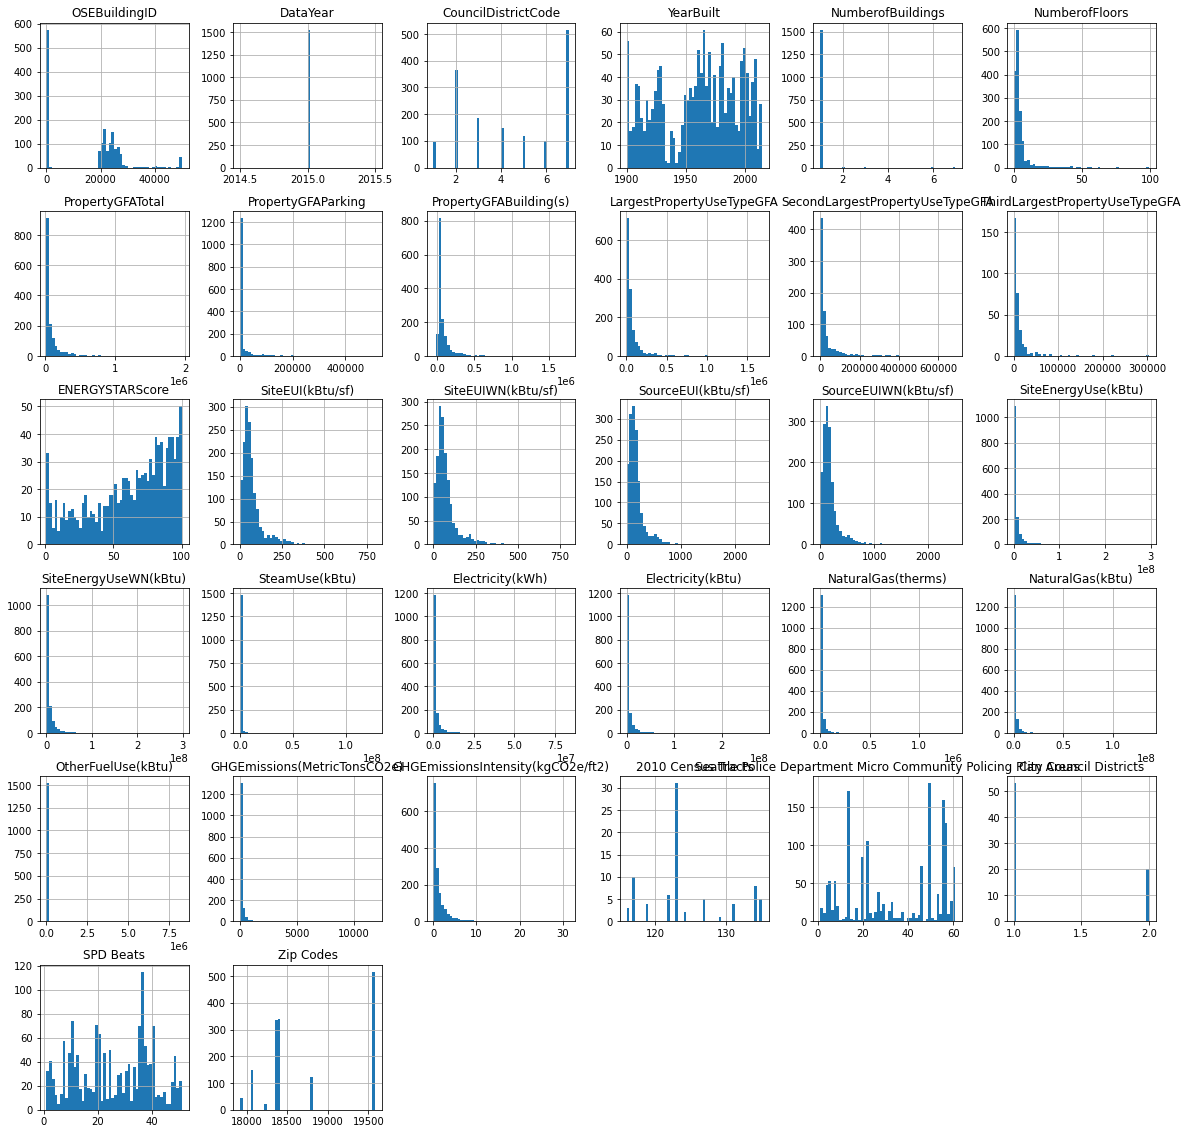

In [29]:
#histogrammes des variables numériques
df[numerical].hist(bins=50, figsize= (20,20))
plt.show()

C:\Users\Olfa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Olfa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Olfa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='NumberofFloors', ylabel='PropertyGFABuilding(s)'>

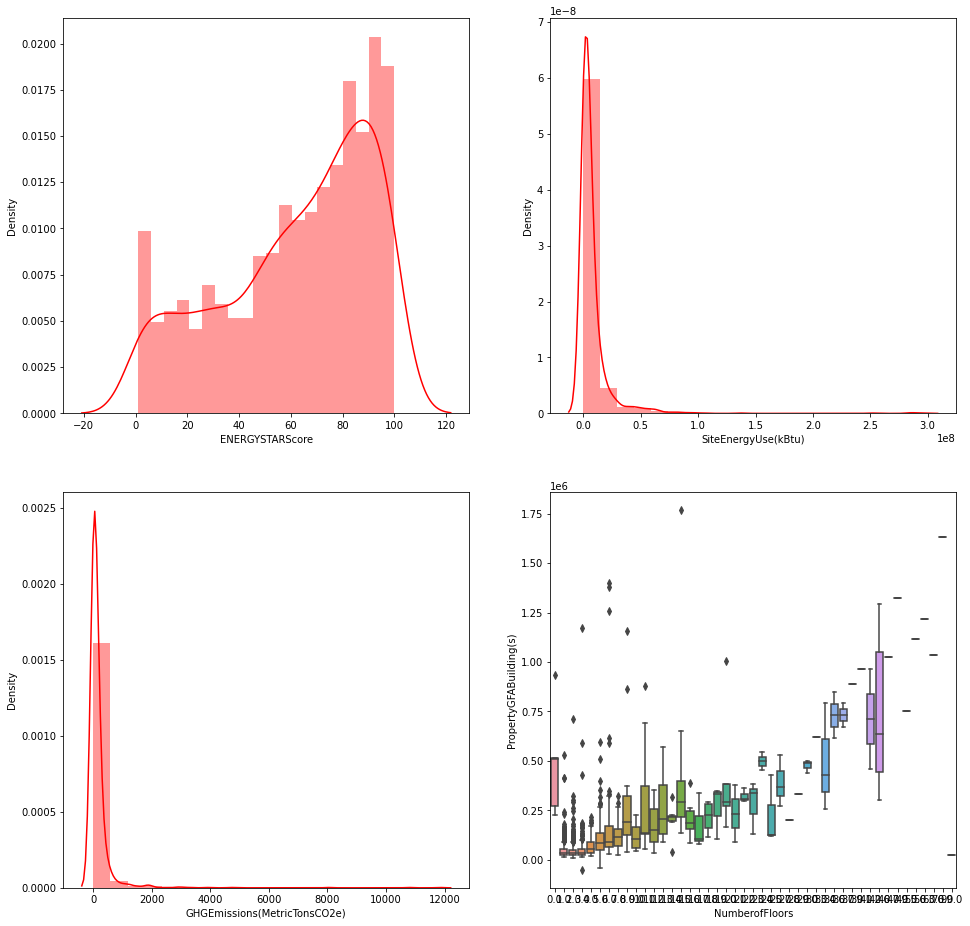

In [30]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(df['ENERGYSTARScore'],bins=20,color='r',ax=ax1)
sns.distplot(df['SiteEnergyUse(kBtu)'],bins=20,color='r',ax=ax2)
sns.distplot(df['GHGEmissions(MetricTonsCO2e)'],bins=20,color='r',ax=ax3)
sns.boxplot(y='PropertyGFABuilding(s)',x='NumberofFloors',data=df,ax=ax4)

In [31]:
def variance_ecartype (df):
    #variance ecart type 
    print("La variance empirique : ",df.var(ddof=0))
    print("L\'écart-type empirique : ",df.std(ddof=0))


In [32]:
def boxplots(df, position, column):
    plt.rcParams["figure.figsize"] = (6,3)
    if position=="H" :
        df.boxplot(column=column, vert=False)
    elif position=="V":
        df.boxplot(column=column, vert=True)
    plt.title('Boxplot  \"'+column,  fontsize=16);
    plt.show()

In [33]:
for column in df.columns :
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        print ("Variable  "+ column)
        variance_ecartype(df[column])

Variable  OSEBuildingID
La variance empirique :  166936468.33046722
L'écart-type empirique :  12920.389635396728
Variable  DataYear
La variance empirique :  0.0
L'écart-type empirique :  0.0
Variable  CouncilDistrictCode
La variance empirique :  4.846939548070105
L'écart-type empirique :  2.2015766050878414
Variable  YearBuilt
La variance empirique :  1079.8638983575036
L'écart-type empirique :  32.86128266452032
Variable  NumberofBuildings
La variance empirique :  0.06653917011465102
L'écart-type empirique :  0.25795187557885874
Variable  NumberofFloors
La variance empirique :  46.12963612094874
L'écart-type empirique :  6.791880160967855
Variable  PropertyGFATotal
La variance empirique :  36219863135.06927
L'écart-type empirique :  190315.16790594824
Variable  PropertyGFAParking
La variance empirique :  2045835093.5297186
L'écart-type empirique :  45230.9086082705
Variable  PropertyGFABuilding(s)
La variance empirique :  26972681053.78402
L'écart-type empirique :  164233.61730712754


In [34]:
#fonction pour tracer le camembert d'une variable catégoriale
def show_pie(df, column): 
    plt.figure(figsize=(8,8))
    df[column].value_counts(normalize=True).plot(kind='pie')
    plt.show()

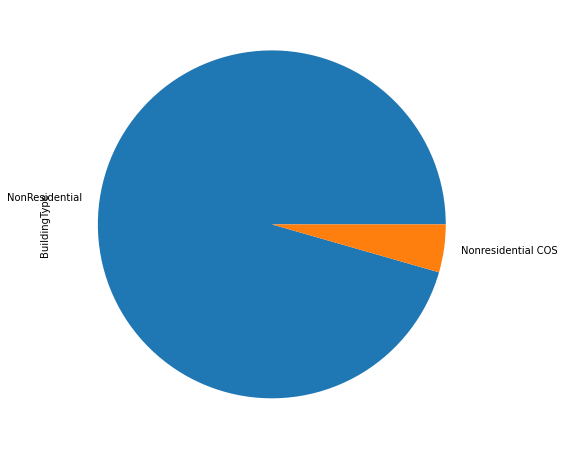

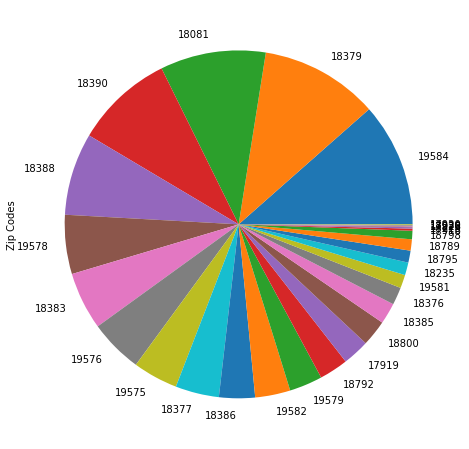

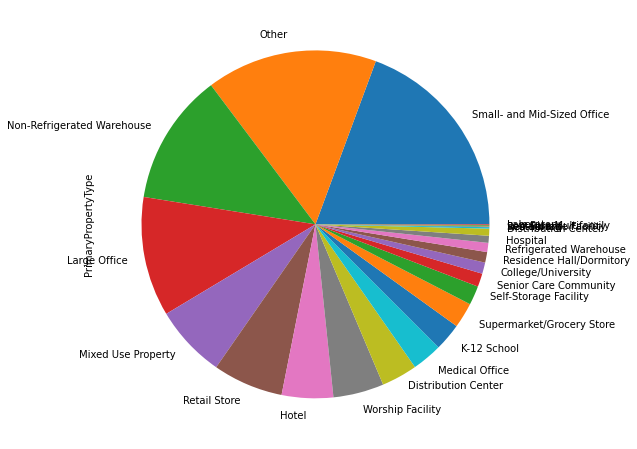

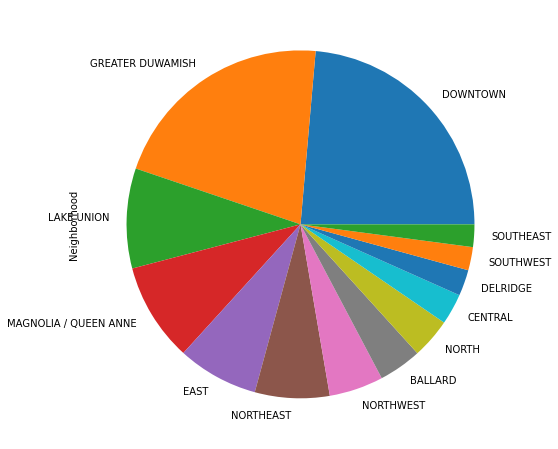

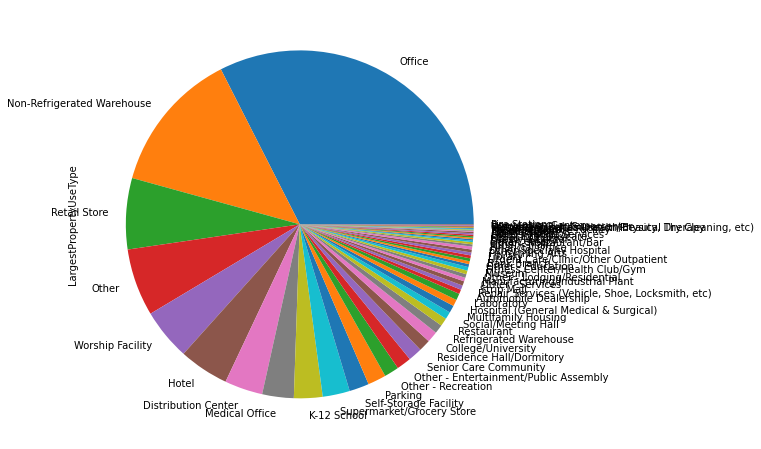

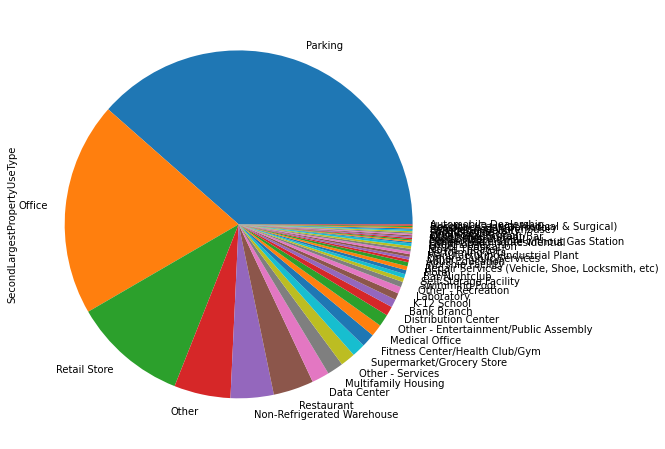

In [35]:
cat_list_to_pie = ['BuildingType','Zip Codes', 'PrimaryPropertyType', 'Neighborhood',  'LargestPropertyUseType', 'SecondLargestPropertyUseType']
for column in cat_list_to_pie :
    show_pie(df, column)

In [36]:
#On peut faire les mêmes traitemenets d'élimination des lignes avec des Nan et croiser les deux dataframes (éliminer les doublons)
df.columns
#On peut présenter la procédure de sélection de variables commme une méthode pour éviter la fuite de donner (biaiser les résultats)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [37]:
def update(row, e_dict):
    returned_category=""
    if pd.notnull(row) :
        for key in e_dict:
            if row in e_dict[key]:
                returned_category= key
                break
    return returned_category


def clean_column (df) :
    propertyType_dict= {"Health" : ['Medical Office', 'Hospital' 'Senior Care Community', 'Laboratory'], 
                    "Eductaion" : ['College/University', 'K-12 School' ], 
                    "Storage" : ['Self-Storage Facility', 'Refrigerated Warehouse', 'Non-Refrigerated Warehouse', 
                                 'Self-Storage Facility\n', 'Distribution Center',  'Retail Store', 
                                 'Distribution Center\n',  'Worship Facility' ], 
                    "Office" : ['Small- and Mid-Sized Office',  'Large Office'], 
                    "Other" : ['Other', 'Mixed Use Property' , 'Low-Rise Multifamily', 'Supermarket/Grocery Store'], 
                  "Hotel": ['Hotel', 'Residence Hall/Dormitory'],
                   "Restaurant":['Restaurant\n', 'Restaurant']} 

    neighborhood_dict = {"North" : ['NORTHEAST', 'NORTHWEST', 'NORTH' , 'BALLARD'], 
                    "South" : ['SOUTHWEST', 'SOUTHEAST', 'DOWNTOWN', 'DELRIDGE'], 
                    "East" : ['MAGNOLIA / QUEEN ANNE', 'EAST'],
                    "Center" : ['LAKE UNION' , 'CENTRAL'],
                    "West" : [ 'GREATER DUWAMISH' ]} 

    df['PrimaryPropertyType']= df['PrimaryPropertyType'].apply (lambda row :  update(row, propertyType_dict))   
    df['Neighborhood']= df['Neighborhood'].apply (lambda row :  update(row, neighborhood_dict))

In [38]:
clean_column (df)

In [39]:
#matrice de correlation avec heatmap 
def correlation_matrix(df):
    plt.figure(figsize = (18,10))
    heatmap= sns.heatmap(df.corr(), annot=True, cmap='BrBG');
    heatmap.set_title('Matrice de correlation des variables sélectionnées', fontdict={'fontsize':12}, pad=12);
   

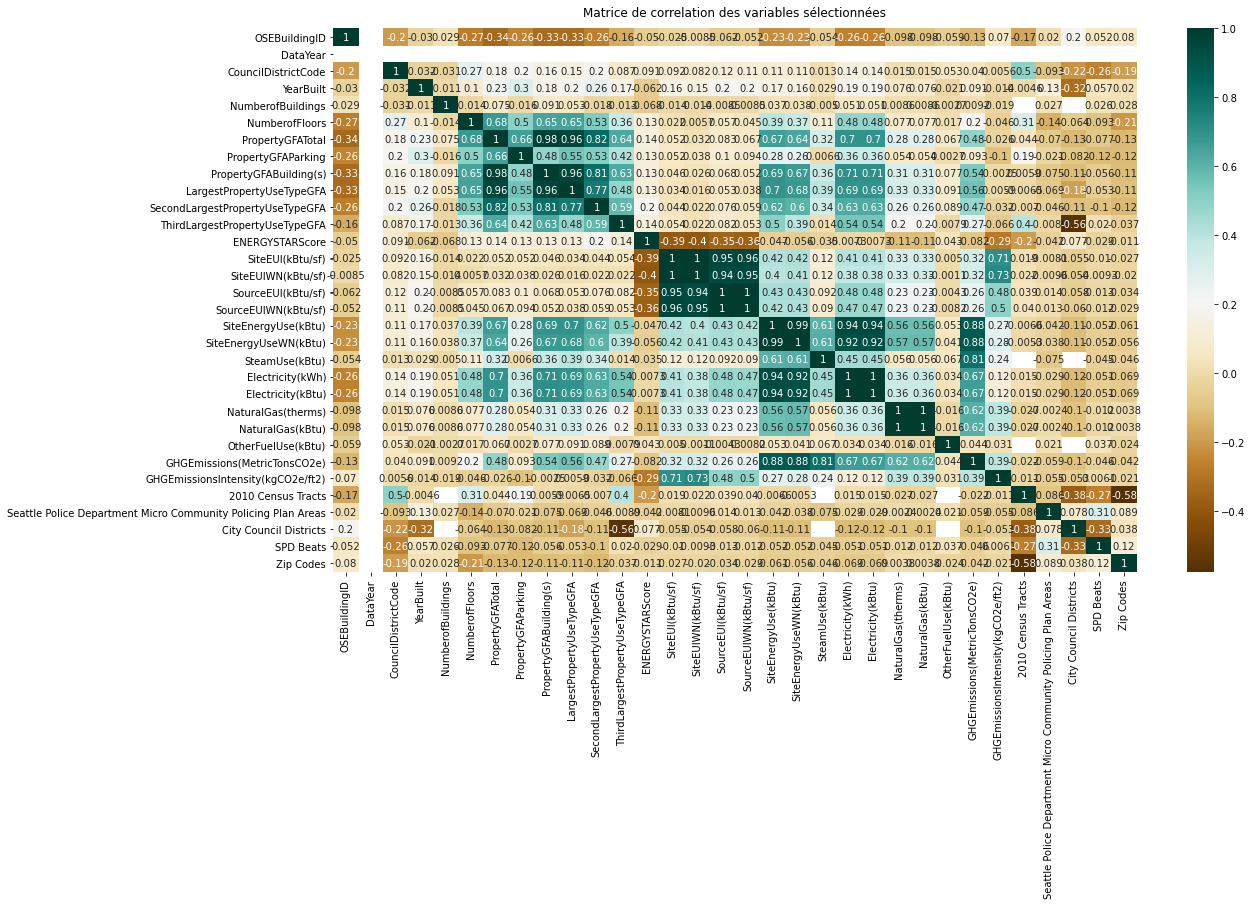

In [40]:
#appel fonction
correlation_matrix(df)

### I.4 Test statistiques de normalité des variables


In [41]:
for c in numerical : 
    data = df[c].values
    D, p = stats.kstest(data, 'norm')
    print('Kolmogorov-Smirnov : D : {0} p-value : {1}'.format(D, p))

Kolmogorov-Smirnov : D : 0.99803764663816 p-value : 0.0
Kolmogorov-Smirnov : D : 1.0 p-value : 0.0
Kolmogorov-Smirnov : D : 0.913809711086484 p-value : 0.0
Kolmogorov-Smirnov : D : 1.0 p-value : 0.0
Kolmogorov-Smirnov : D : 0.8413447460685429 p-value : 0.0
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : 1.0 p-value : 0.0
Kolmogorov-Smirnov : D : 0.49934597776324396 p-value : 0.0
Kolmogorov-Smirnov : D : 0.9986919555264879 p-value : 0.0
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D : nan p-value : nan
Kolmogorov-Smirnov : D :

### I.5 Ingénierie des variables
- Construction de nouvelles variables explicatives caractérisant les bâtiments dans la modélisation de conso , emission co2
- Commencer les pré-traitements des données, les transformations log sur les variables non gaussiennes


In [42]:
print(df.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [43]:
#Afficher les valeurs uniques de chaque variable catégoriale pour savoir les quelles encoder (nombre de valeurs uniques
#raisonnable qui n'explose pas le nnombre de variable suite à un One Hot Encoding)
for c in category : 
    print(c+' contient des valeurs uniques au nombre de :'+str(len(df[c].unique())))
    print(df[c].unique())
    print()
 


BuildingType contient des valeurs uniques au nombre de :2
['NonResidential' 'Nonresidential COS']

PrimaryPropertyType contient des valeurs uniques au nombre de :8
['Hotel' 'Other' 'Eductaion' 'Office' 'Storage' '' 'Health' 'Restaurant']

PropertyName contient des valeurs uniques au nombre de :1490
['MAYFLOWER PARK HOTEL' 'PARAMOUNT HOTEL' 'WESTIN HOTEL' ...
 'WEST COAST SELF-STORAGE' 'FREEWAY MOTORS UNIVERSITY AUDI'
 'Salmon Bay Marine Center West']

TaxParcelIdentificationNumber contient des valeurs uniques au nombre de :1462
['659000030' '659000220' '659000475' ... '3357400211' '6746701515'
 '2771605298']

Location contient des valeurs uniques au nombre de :1493
['{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'
 '{\'latitude\': \'47.61310583\', \'longitude\': \'-122.33335756\', \'human_address\': \'{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip

On applique le OneHotEncoding sur les variables avec un nombre de valeurs uniques ne dépassant pas les 20

In [44]:
#On élimine les zip étant présent moins de 20 fois, 
#pour ceci on compte le nombre d'occurence de chaque zip code et on met dans une variable count_per_zip

def get_count_per_zip(row, data):
    for value in data.index : 
        if row== value :
            return data[value]



In [45]:
df['count_per_zip'] = 1
data = df.groupby("Zip Codes")['OSEBuildingID'].count()
df['count_per_zip'] = df['Zip Codes'].apply (lambda row : get_count_per_zip(row, data))
print(df['count_per_zip'])
df= df.drop(df[np.isnan(df['count_per_zip'])].index)
df= df.drop(df[df['count_per_zip'] < 25].index)


0       150
1       150
2       150
3       150
4        76
       ... 
3313    117
3314    140
3319     38
3322     82
3334     18
Name: count_per_zip, Length: 1529, dtype: int64


In [46]:
df.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,count_per_zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,South,1927,...,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,150
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,South,1996,...,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,150
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,South,1969,...,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,150
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,South,1926,...,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,150
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,South,1980,...,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,76


In [47]:
#nouvelle taillle du dataframe 
print(df.shape)

(1438, 51)


In [48]:
data = df.groupby("Zip Codes")['OSEBuildingID'].count()
data.shape

(18,)

In [49]:
print('ZipCode contient des valeurs uniques au nombre de :'+str(len(df['Zip Codes'].unique())))
df['Zip Codes'].astype(np.int64) 
print(df['Zip Codes'].unique())# les zip restants dans le dataframe ... au lieu de 49
    


ZipCode contient des valeurs uniques au nombre de :18
[18081 19576 18379 18383 18377 18800 18386 17919 18390 19575 19578 19582
 18792 19584 18388 19579 18376 18385]


In [50]:
from datetime import date
#calcul de l'age du batiment'BuildingAge': current year - construction year
todays_date = date.today()
df['BuildingAge'] = todays_date.year - df['YearBuilt']


In [51]:
df[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'OtherFuelUse(kBtu)']] = df[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'OtherFuelUse(kBtu)']].fillna(0, )

In [52]:
columns_to_use =['BuildingType', 'PrimaryPropertyType','NumberofBuildings', 'NumberofFloors', 'Neighborhood','PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)',  'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ComplianceStatus', 'DefaultData', 
                 'SecondLargestPropertyUseTypeGFA', "Latitude", "Longitude", 
       'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)','GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Zip Codes', 'BuildingAge']
df1 = df[columns_to_use]

In [53]:
df= df1.dropna()
print(df1.shape)
print(df.shape)


(1438, 31)
(914, 31)


In [54]:
#transformation des variables target
df['Log-GHGEmissions(MetricTonsCO2e)']= df['GHGEmissions(MetricTonsCO2e)']
df['Log-SiteEnergyUse(kBtu)']=df['SiteEnergyUse(kBtu)']
for index, row in df.iterrows():
    if pd.isnull(row['GHGEmissions(MetricTonsCO2e)']):
        row['Log-GHGEmissions(MetricTonsCO2e)'] =0
    else :
         row['Log-GHGEmissions(MetricTonsCO2e)'] = np.log2(row['GHGEmissions(MetricTonsCO2e)']+0.001)
    
   

<ipython-input-54-b8ed5a363caa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log-GHGEmissions(MetricTonsCO2e)']= df['GHGEmissions(MetricTonsCO2e)']
<ipython-input-54-b8ed5a363caa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log-SiteEnergyUse(kBtu)']=df['SiteEnergyUse(kBtu)']


In [55]:
for index, row in df.iterrows():
    if  pd.isnull(row['SiteEnergyUse(kBtu)']):
        row['Log-SiteEnergyUse(kBtu)'] =0 
    else : 
        row['Log-SiteEnergyUse(kBtu)'] = np.log2(row['SiteEnergyUse(kBtu)']+0.001)

In [56]:
#calcul de pourcentage d'utilisation par surce 
#On suppose qu'il n'y aura pas de travaux et que les pourcentages de l'utilisation par type de ressource resteront inchangés 

#Electricity percentage
df['Electricity(kBtu)Percentage'] = df['Electricity(kBtu)']*100/(df['Electricity(kBtu)']+df['NaturalGas(kBtu)']+df['SteamUse(kBtu)']+ df['OtherFuelUse(kBtu)'])

#Natural Gas percentage use 
df['NaturalGas(kBtu)Percentage'] = df['NaturalGas(kBtu)']*100/(df['Electricity(kBtu)']+df['NaturalGas(kBtu)']+df['SteamUse(kBtu)']+ df['OtherFuelUse(kBtu)'])

#Steam source percentage use 
df['SteamUse(kBtu)Percentage'] = df['SteamUse(kBtu)']*100/(df['Electricity(kBtu)']+df['NaturalGas(kBtu)']+df['SteamUse(kBtu)']+ df['OtherFuelUse(kBtu)'])

#OtherFuelUse percentage use 
df['OtherFuelUse(kBtu)Percentage'] = df['OtherFuelUse(kBtu)']*100/(df['Electricity(kBtu)']+df['NaturalGas(kBtu)']+df['SteamUse(kBtu)']+ df['OtherFuelUse(kBtu)'])

<ipython-input-56-9af719ab9633>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electricity(kBtu)Percentage'] = df['Electricity(kBtu)']*100/(df['Electricity(kBtu)']+df['NaturalGas(kBtu)']+df['SteamUse(kBtu)']+ df['OtherFuelUse(kBtu)'])
<ipython-input-56-9af719ab9633>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NaturalGas(kBtu)Percentage'] = df['NaturalGas(kBtu)']*100/(df['Electricity(kBtu)']+df['NaturalGas(kBtu)']+df['SteamUse(kBtu)']+ df['OtherFuelUse(kBtu)'])
<ipython-input-56-9af719ab9633>:

In [57]:
df['OtherFuelUse(kBtu)Percentage'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: OtherFuelUse(kBtu)Percentage, dtype: float64

In [58]:
# pondération de l'usage avec la surface 
for index, row in df.iterrows():
    if pd.notna(row['PropertyGFABuilding(s)']) and row['PropertyGFABuilding(s)']!=0:
        if pd.notna(row['LargestPropertyUseTypeGFA'])  :
            df['LargestUseSurfacePercentage']= df['LargestPropertyUseTypeGFA']*100/ df['PropertyGFABuilding(s)'] 
        else :
            #if  pd.isna(row['LargestPropertyUseTypeGFA']): 
            df['LargestUseSurfacePercentage']  =  0.0
        
        if pd.notna(row['SecondLargestPropertyUseTypeGFA']):
            df['SecondLargestUseSurfacePercentage'] = (df['SecondLargestPropertyUseTypeGFA']  *100) / df['PropertyGFABuilding(s)'] 
        else :
            #ifpd.isna(row['SecondLargestPropertyUseTypeGFA']):
            df['SecondLargestUseSurfacePercentage'] =  0.0
        
        if pd.notna(row['ThirdLargestPropertyUseTypeGFA']):
            df['ThirdLargestUseSurfacePercentage'] = (df['ThirdLargestPropertyUseTypeGFA']  *100) / df['PropertyGFABuilding(s)'] 
        else :
            #ifpd.isna(row['SecondLargestPropertyUseTypeGFA']):
            df['ThirdLargestUseSurfacePercentage'] =  0.0

<ipython-input-58-a70a3e2a1bd7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LargestUseSurfacePercentage']= df['LargestPropertyUseTypeGFA']*100/ df['PropertyGFABuilding(s)']
<ipython-input-58-a70a3e2a1bd7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SecondLargestUseSurfacePercentage'] = (df['SecondLargestPropertyUseTypeGFA']  *100) / df['PropertyGFABuilding(s)']
<ipython-input-58-a70a3e2a1bd7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [59]:
#df['ThirdLargestUseSurfacePercentage'].sort_values(ascending=False).head(100)

In [60]:
#'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)',
for index, row in df.iterrows():
    if pd.notna(row['PropertyGFATotal'])  and pd.notna(row['PropertyGFABuilding(s)']):
        if pd.notna(row['PropertyGFABuilding(s)']) :
            df['PropertyGFABuildingPercentage']= df['PropertyGFABuilding(s)']*100/ df['PropertyGFATotal'] 
        elif  pd.isna(row['PropertyGFABuilding(s)']): 
            df['PropertyGFABuildingPercentage']  =  0.0

<ipython-input-60-1f7403bb3e5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PropertyGFABuildingPercentage']= df['PropertyGFABuilding(s)']*100/ df['PropertyGFATotal']


In [61]:
def one_hot_encoding(df, column):
    df_encoded  = pd.get_dummies(df[column],  prefix = column)
    df= pd.concat([df, df_encoded], axis = 1)
    df= df.drop_duplicates()
    return df


In [62]:
#liste de variables à encoder 
encoded_columns = ['PrimaryPropertyType', 'BuildingType', 'Zip Codes']
for column in encoded_columns :
    df= one_hot_encoding(df, column)
    
df= df.drop(encoded_columns, axis=1)

In [63]:
#from scipy import stats
#df.apply(lambda x: stats.boxcox(x)[0])

In [64]:
df.head(10)

,NumberofBuildings,NumberofFloors,Neighborhood,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ComplianceStatus,DefaultData,...,Zip Codes_18388,Zip Codes_18390,Zip Codes_18792,Zip Codes_18800,Zip Codes_19575,Zip Codes_19576,Zip Codes_19578,Zip Codes_19579,Zip Codes_19582,Zip Codes_19584
0,1,12.0,South,88434,0,88434,Hotel,88434.0,Compliant,No,...,0,0,0,0,0,0,0,0,0,0
1,1,11.0,South,103566,15064,88502,Hotel,83880.0,Compliant,No,...,0,0,0,0,0,0,0,0,0,0
2,1,41.0,South,961990,0,961990,Hotel,757243.0,Compliant,Yes,...,0,0,0,0,0,0,0,0,0,0
3,1,10.0,South,61320,0,61320,Hotel,61320.0,Compliant,No,...,0,0,0,0,0,0,0,0,0,0
4,1,18.0,South,119890,12460,107430,Hotel,123445.0,Compliant,No,...,0,0,0,0,0,1,0,0,0,0
6,1,11.0,South,83008,0,83008,Hotel,81352.0,Compliant,No,...,0,0,0,0,0,0,0,0,0,0
8,1,15.0,South,163984,0,163984,Hotel,163984.0,Compliant,No,...,0,0,0,0,0,0,0,0,0,0
11,1,25.0,South,333176,61161,272015,Hotel,336640.0,Compliant,No,...,0,0,0,0,0,0,0,0,0,0
12,1,9.0,South,65009,0,65009,Hotel,65009.0,Compliant,No,...,0,0,0,0,0,0,0,0,0,0
13,1,33.0,South,315952,57600,258352,Hotel,295511.0,Compliant,Yes,...,0,0,0,0,0,0,0,0,0,0


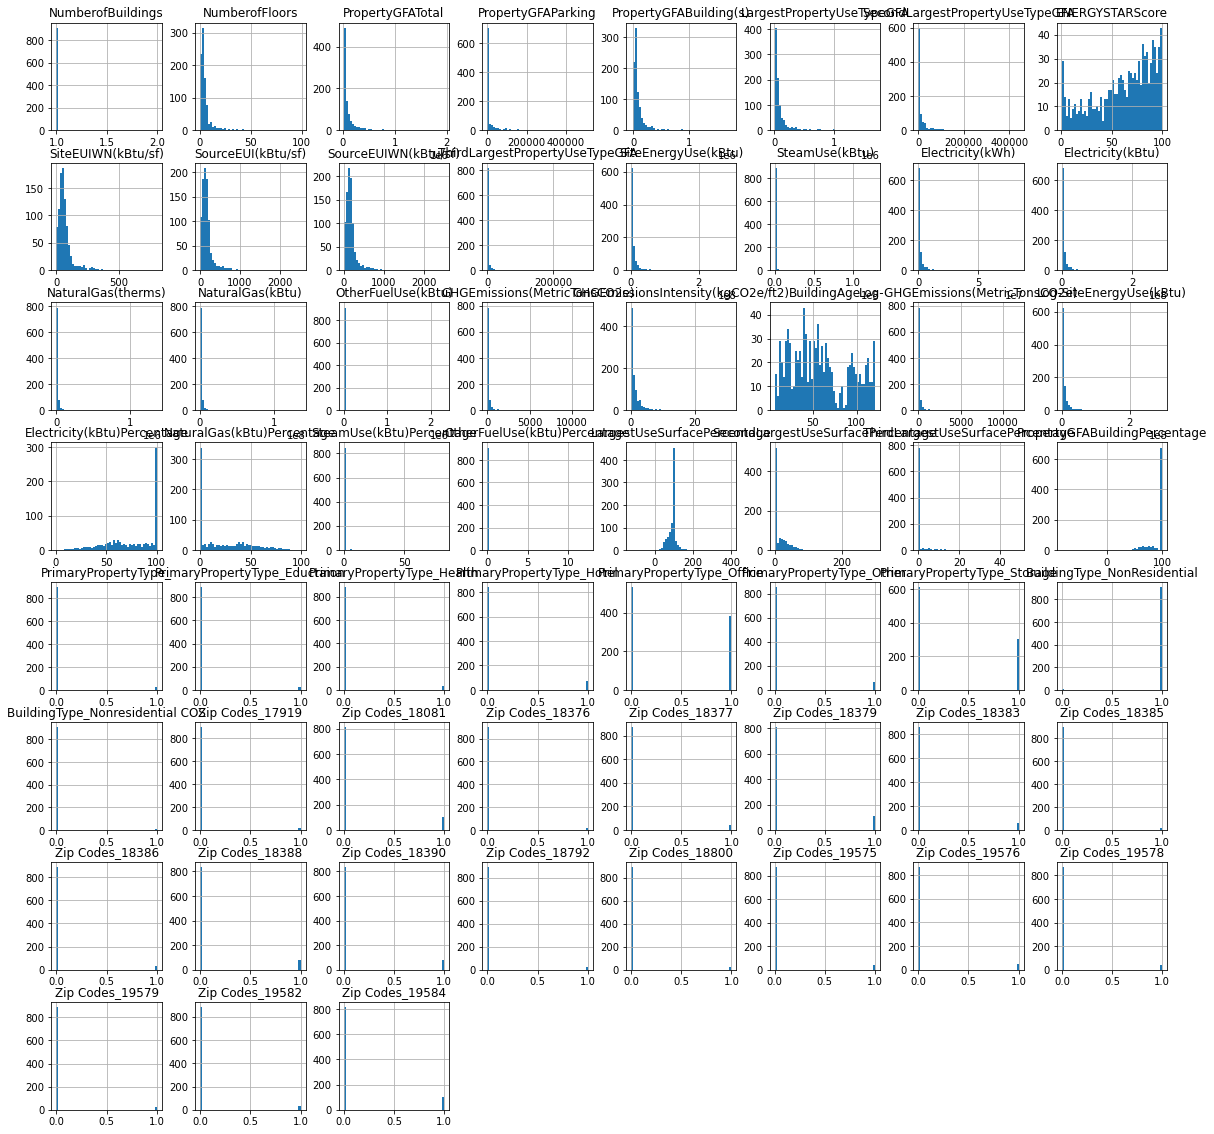

In [65]:
#histogramme des nouvelles variables transformées 
df.hist(bins=50, figsize= (20,20))
plt.show()

### Interprétations 
- Dans notre prédiction, nous devons éviter la fuite de données en éliminant les variables qui ne pourront pas être renseignées sauf après calcul et repérage sur site comme : SiteEU..., SourceEU.. SiteEnergy.... SteamUse, 
- On enleve également les variables en relation avec la deuxième variable à prédire (emission) : TotalGHGEmission, GHGEmission... 

- Sur les variables Electricity et NaturalGaz on choisit une unité (KBtu) 

- Pour obtenir le dataframe final sur lequel se fait la prédiction, on va considérer les variables que nous avons générés, les variables qui sont transformés avec le log et OneHotEncoded 


Aucune variable gaussienne donc on va appliquer la transformation log sur toutes les variables numériques et observer les nouvelles allures
Pour appliquer le log il faut qu'il n'y est pas de valeur NaN ou de 0

C:\Users\Olfa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution de la variable Consommation d energie'}, xlabel='SiteEnergyUse(kBtu)', ylabel='Density'>

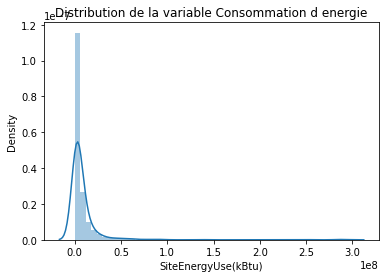

In [66]:
plt.title('Distribution de la variable Consommation d energie')
sns.distplot(df['SiteEnergyUse(kBtu)'])

C:\Users\Olfa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution de la variable emission co2'}, xlabel='GHGEmissions(MetricTonsCO2e)', ylabel='Density'>

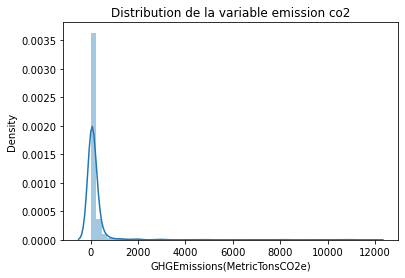

In [67]:
plt.title('Distribution de la variable emission co2')
sns.distplot(df['GHGEmissions(MetricTonsCO2e)'])

In [68]:
for c in df.columns :
    print("\""+c+"\",")

"NumberofBuildings",
"NumberofFloors",
"Neighborhood",
"PropertyGFATotal",
"PropertyGFAParking",
"PropertyGFABuilding(s)",
"LargestPropertyUseType",
"LargestPropertyUseTypeGFA",
"ComplianceStatus",
"DefaultData",
"SecondLargestPropertyUseTypeGFA",
"Latitude",
"Longitude",
"ENERGYSTARScore",
"SiteEUIWN(kBtu/sf)",
"SourceEUI(kBtu/sf)",
"SourceEUIWN(kBtu/sf)",
"ThirdLargestPropertyUseTypeGFA",
"SiteEnergyUse(kBtu)",
"SteamUse(kBtu)",
"Electricity(kWh)",
"Electricity(kBtu)",
"NaturalGas(therms)",
"NaturalGas(kBtu)",
"OtherFuelUse(kBtu)",
"GHGEmissions(MetricTonsCO2e)",
"GHGEmissionsIntensity(kgCO2e/ft2)",
"BuildingAge",
"Log-GHGEmissions(MetricTonsCO2e)",
"Log-SiteEnergyUse(kBtu)",
"Electricity(kBtu)Percentage",
"NaturalGas(kBtu)Percentage",
"SteamUse(kBtu)Percentage",
"OtherFuelUse(kBtu)Percentage",
"LargestUseSurfacePercentage",
"SecondLargestUseSurfacePercentage",
"ThirdLargestUseSurfacePercentage",
"PropertyGFABuildingPercentage",
"PrimaryPropertyType_",
"PrimaryPropertyType_Eductaion"

In [69]:
#les listes finales des colonnes dans les deux dataframes utilisés pour la prédiction des emission et consommation
#'ZipCode', 
   
df_pred_columns = ['NumberofBuildings',
       'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'Latitude', 'Longitude', 'ENERGYSTARScore',
        'GHGEmissions(MetricTonsCO2e)','BuildingAge',
       'Log-GHGEmissions(MetricTonsCO2e)', 'Log-SiteEnergyUse(kBtu)',
       'Electricity(kBtu)Percentage', 'NaturalGas(kBtu)Percentage',
       'SteamUse(kBtu)Percentage', "ThirdLargestUseSurfacePercentage", 
                   
       'LargestUseSurfacePercentage', 'PropertyGFABuildingPercentage',
       'PrimaryPropertyType_', 'PrimaryPropertyType_Health',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other', 'PrimaryPropertyType_Storage',
       'BuildingType_NonResidential', 'BuildingType_Nonresidential COS',
       'Zip Codes_17919', 'Zip Codes_18081', 'Zip Codes_18376',
       'Zip Codes_18377', 'Zip Codes_18379', 'Zip Codes_18383',
       'Zip Codes_18385', 'Zip Codes_18386', 'Zip Codes_18388',
       'Zip Codes_18390', 'Zip Codes_18792', 'Zip Codes_18800',
       'Zip Codes_19575', 'Zip Codes_19576', 'Zip Codes_19578',
       'Zip Codes_19579', 'Zip Codes_19582', 'Zip Codes_19584']


In [70]:
df_pred= df[df_pred_columns]

In [71]:
df_pred.head(5)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,Latitude,Longitude,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),...,Zip Codes_18388,Zip Codes_18390,Zip Codes_18792,Zip Codes_18800,Zip Codes_19575,Zip Codes_19576,Zip Codes_19578,Zip Codes_19579,Zip Codes_19582,Zip Codes_19584
0,1,12.0,0,88434,88434.0,0.0,47.61219025,-122.33799744,65.0,249.43,...,0,0,0,0,0,0,0,0,0,0
1,1,11.0,15064,88502,83880.0,15064.0,47.61310583,-122.33335756,51.0,263.51,...,0,0,0,0,0,0,0,0,0,0
2,1,41.0,0,961990,757243.0,100000.0,47.61334897,-122.33769944,18.0,2061.48,...,0,0,0,0,0,0,0,0,0,0
3,1,10.0,0,61320,61320.0,0.0,47.61421585,-122.33660889,1.0,1936.34,...,0,0,0,0,0,0,0,0,0,0
4,1,18.0,12460,107430,123445.0,68009.0,47.6137544,-122.3409238,67.0,507.70,...,0,0,0,0,0,1,0,0,0,0


In [72]:
def correct_row(row):
    row= row.replace ("'", "").replace (":", "").replace(" ", "")
    row= pd.to_numeric(row, errors='coerce')
    return row

In [73]:
#df_pred['Latitude']= df_pred['Latitude'].apply(lambda row : correct_row(row))  
#df_pred['Longitude']= df_pred['Longitude'].apply(lambda row : correct_row(row))  

In [74]:
# ne pas appliquer la transformation log sur les variables avec une valeur dominante = 1 
def transform_variables_log( df, columns ):
    for column in columns :
        if column != "NumberofBuildings" and column != "NumberofFloors" and  column !=  "OtherFuelUse(kBtu)Percentage"  :
            for index, row in df.iterrows():
                row[column] = np.log2(abs(float(row[column]))+0.001)
    return df 

In [75]:
columns_to_transform = ["NumberofBuildings","NumberofFloors","PropertyGFAParking","PropertyGFABuilding(s)",
"LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA","Latitude","Longitude",
"BuildingAge","Electricity(kBtu)Percentage","NaturalGas(kBtu)Percentage","SteamUse(kBtu)Percentage",
"LargestUseSurfacePercentage", "PropertyGFABuildingPercentage"]
df_pred = transform_variables_log(df_pred , columns_to_transform)

In [76]:
df_pred[columns_to_transform].head()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,Latitude,Longitude,BuildingAge,Electricity(kBtu)Percentage,NaturalGas(kBtu)Percentage,SteamUse(kBtu)Percentage,LargestUseSurfacePercentage,PropertyGFABuildingPercentage
0,1,12.0,0,88434,88434.0,0.0,47.61219025,-122.33799744,94,52.798364,18.224929,28.976707,100.000000,100.000000
1,1,11.0,15064,88502,83880.0,15064.0,47.61310583,-122.33335756,25,46.746779,53.253221,0.000000,94.777519,85.454686
2,1,41.0,0,961990,757243.0,100000.0,47.61334897,-122.33769944,52,68.043992,5.072831,26.883177,78.716307,100.000000
3,1,10.0,0,61320,61320.0,0.0,47.61421585,-122.33660889,95,9.808992,7.091513,83.099495,100.000000,100.000000
4,1,18.0,12460,107430,123445.0,68009.0,47.6137544,-122.3409238,41,40.907019,59.092981,0.000000,114.907382,89.607140


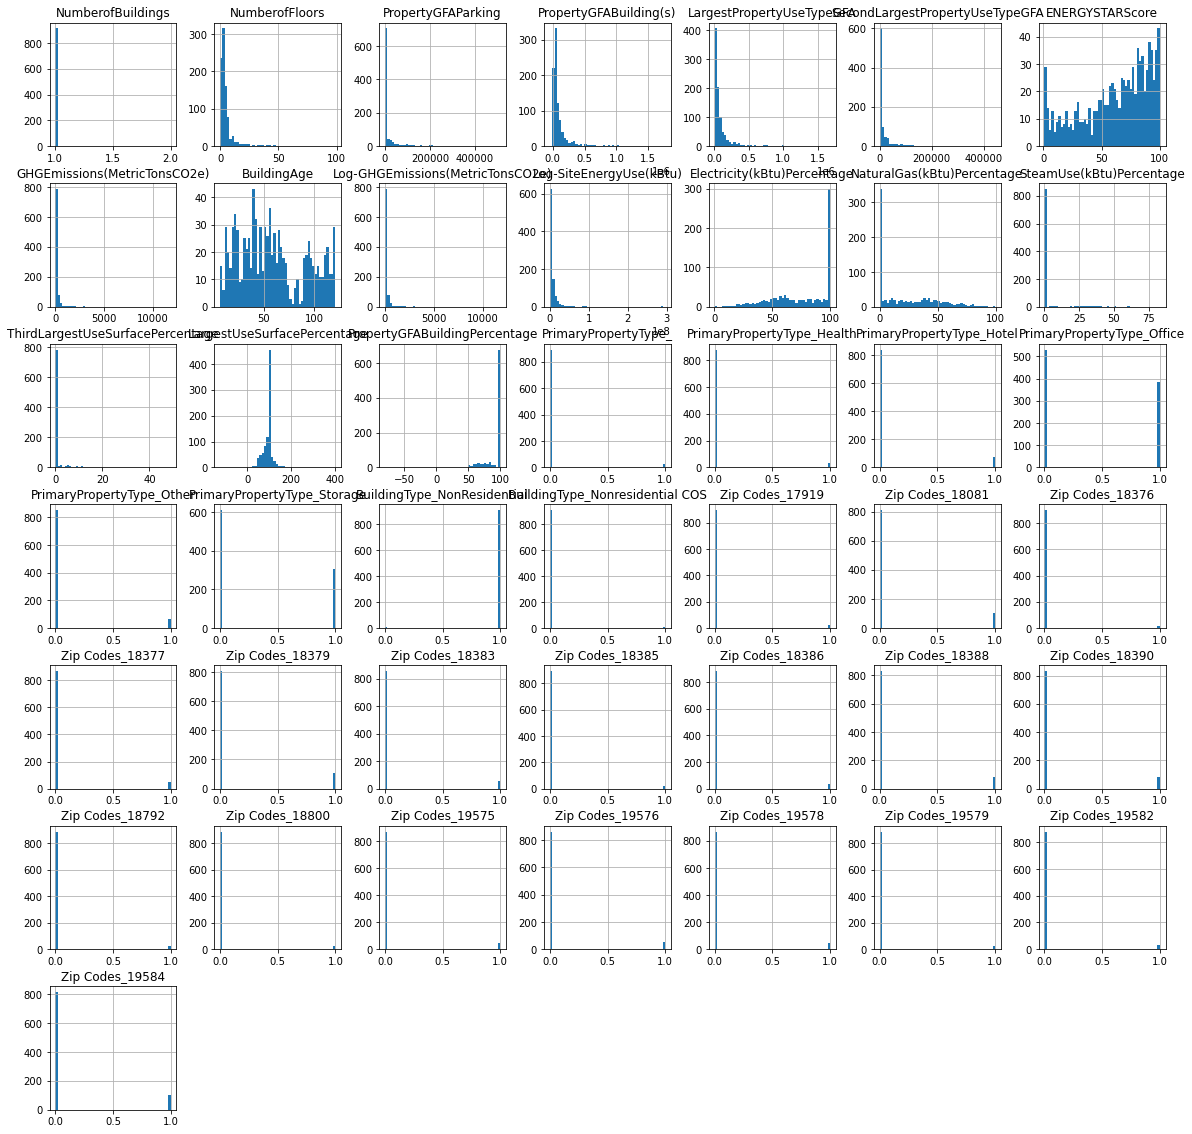

In [77]:
df_pred.hist(bins=50, figsize= (20,20))
plt.show()

In [78]:
#verification d'absence de Nan dans le dataset
print(df_pred.isna().sum().sum())
print (df_pred.notnull().sum().sum())

0
41130


In [79]:
#dernier affichage pour vérification de la cohérence des données 
df_pred.head(100)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,Latitude,Longitude,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),...,Zip Codes_18388,Zip Codes_18390,Zip Codes_18792,Zip Codes_18800,Zip Codes_19575,Zip Codes_19576,Zip Codes_19578,Zip Codes_19579,Zip Codes_19582,Zip Codes_19584
0,1,12.0,0,88434,88434.0,0.0,47.61219025,-122.33799744,65.0,249.43,...,0,0,0,0,0,0,0,0,0,0
1,1,11.0,15064,88502,83880.0,15064.0,47.61310583,-122.33335756,51.0,263.51,...,0,0,0,0,0,0,0,0,0,0
2,1,41.0,0,961990,757243.0,100000.0,47.61334897,-122.33769944,18.0,2061.48,...,0,0,0,0,0,0,0,0,0,0
3,1,10.0,0,61320,61320.0,0.0,47.61421585,-122.33660889,1.0,1936.34,...,0,0,0,0,0,0,0,0,0,0
4,1,18.0,12460,107430,123445.0,68009.0,47.6137544,-122.3409238,67.0,507.70,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1,17.0,84600,293925,236827.0,83311.0,47.60390362,-122.33424932,68.0,862.64,...,0,0,0,0,0,0,0,0,0,0
223,1,47.0,0,1323055,1011135.0,272682.0,47.60523404,-122.33465706,93.0,321.72,...,0,0,0,0,0,0,0,0,0,0
224,1,41.0,129432,460489,485296.0,92787.0,47.60533104,-122.33503955,82.0,182.71,...,0,0,0,0,0,0,0,0,0,0
226,1,8.0,62993,94948,84838.0,15401.0,47.60571018,-122.33639455,89.0,22.01,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#transformaton en fichier csv
df_pred.to_csv('building_selection.csv')

Nous avons nettoyé, selectionné, filtré et transformé les variables et créé une nouvelle entrée (fichier csv) pour l'étape de modélisation afin de prédire la consommation d'énergie et l'émission en gaz a effet de serre